# Дано:


In [3]:
import numpy as np
x = np.array([10, 20, 30, 40, 50, 60, 70, 80, 90, 95])
y = np.array([1000, 600, 480, 430, 415, 412, 410, 405, 400, 392])
print(x, y)

[10 20 30 40 50 60 70 80 90 95] [1000  600  480  430  415  412  410  405  400  392]


Расчитываем $x_{i}^2, x_{i}^3, x_{i}^4, x_{i}^2y_{i}, x_{i}y_{i}$

In [6]:
x_2 = np.power(x, 2)
x_3 = np.power(x, 3)
x_4 = np.power(x, 4)
x_2y = x_2 * y
xy = x*y
print(x_2, x_3, x_4, x_2y, xy, sep='\n') 

[ 100  400  900 1600 2500 3600 4900 6400 8100 9025]
[  1000   8000  27000  64000 125000 216000 343000 512000 729000 857375]
[   10000   160000   810000  2560000  6250000 12960000 24010000 40960000
 65610000 81450625]
[ 100000  240000  432000  688000 1037500 1483200 2009000 2592000 3240000
 3537800]
[10000 12000 14400 17200 20750 24720 28700 32400 36000 37240]


Рассчитываем суммы:

In [12]:
x_sum = np.sum(x)
y_sum = np.sum(y)
x_2_sum = np.sum(x_2)
x_3_sum = np.sum(x_3)
x_4_sum = np.sum(x_4)
x_2y_sum = np.sum(x_2y)
xy_sum = np.sum(xy)
x_sum, y_sum, x_2_sum, x_3_sum, x_4_sum, x_2y_sum, xy_sum

(545, 4944, 37525, 2882375, 234780625, 15359500, 233410)

СЛУ для нахождения коэффицентов:
$$
\begin{cases}\displaystyle
na_{0}+a_{1}\sum_{i=1}^nx_{i} + a_{2}\sum_{i=1}^nx_{i}^2 = a_{1}\sum_{i=1}^ny_{i} \\
\displaystyle a_{0}\sum_{i=1}^nx_{i} + a_{1}\sum_{i=1}^nx_{i}^2 + a_{2}\sum_{i=1}^nx_{i}^3 = \sum_{i=1}^nx_{i}y_{i} \\
\displaystyle a_{0}\sum_{i=1}^nx_{i}^2 + a_{1}\sum_{i=1}^nx_{i}^3+ a_{2}\sum_{i=1}^nx_{i}^4 = \sum_{i=1}^nx_{i}^2y_{i} 
\end{cases}
$$


$$
\begin{cases}
10a_{0} + a_{1}545 + a_{2}37525 = 4944 \\
a_{0}545 + a_{1}37525 + a_{2}2882375 = 233410 \\
a_{0}37525 + a_{1}2882375 + a_{2}234780625 = 15359500
\end{cases}
$$

$$
a_{0} = 1063.0, a_{1} = -20.940, a_{2} = 0.15260
$$
Записываем уравнение:
$y = 0.15260x^2 - 20.940x + 1063$
Вычисляем расчетное y и невязки $\hat{y_{i}}, \delta_{i}, \delta_{i}^2$, строим график

In [26]:
temp = []
def foo(x):
    return x*x*0.15260 - x*20.940 + 1063
for i in x:
    temp.append(foo(i))
y_calc = np.array(temp)
delta = np.abs(y_calc - y)
delta_2 = np.power(delta, 2)
print(*y_calc)
print(*delta)
print(*delta_2)

868.86 705.24 572.14 469.55999999999995 397.5 355.9599999999999 344.9399999999998 364.44000000000005 414.46000000000004 450.91499999999996
131.14 105.24000000000001 92.13999999999999 39.559999999999945 17.5 56.04000000000008 65.06000000000017 40.559999999999945 14.460000000000036 58.914999999999964
17197.699599999996 11075.457600000002 8489.779599999998 1564.9935999999957 306.25 3140.4816000000087 4232.803600000023 1645.1135999999956 209.09160000000105 3470.9772249999955


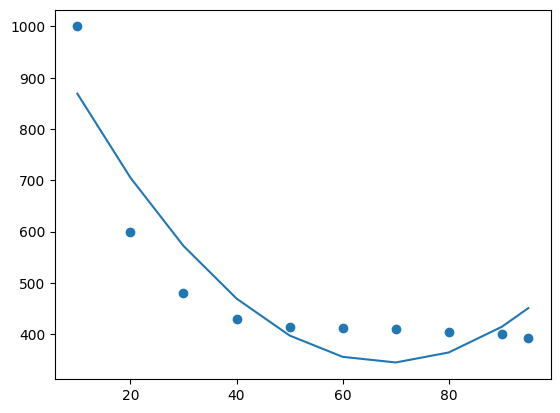

In [25]:
import matplotlib.pyplot as plt 
fig, ax = plt.subplots()
ax.scatter(x, y)
ax.plot(x, y_calc)
plt.show()

Прогнозирование стоимости подключения при плотности 100 чел/км$^2$

In [27]:
foo(100)

495.0000000000002